In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Opening the file
df = pd.read_csv("USA_cars_datasets.csv")

dupl = df.duplicated()
print("Number of duplicated rows:", dupl.sum())
print(df[dupl])

Number of duplicated rows: 0
Empty DataFrame
Columns: [Unnamed: 0, price, brand, model, year, title_status, mileage, color, vin, lot, state, country, condition]
Index: []


In [3]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


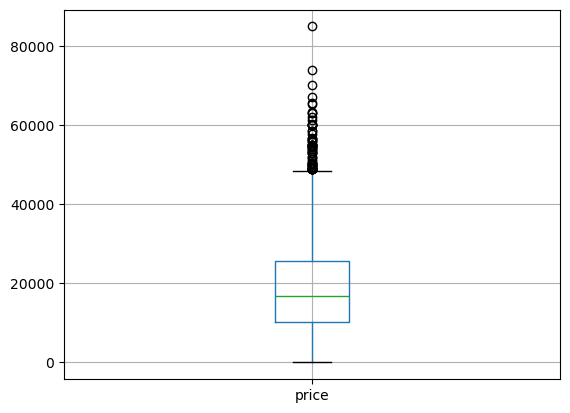

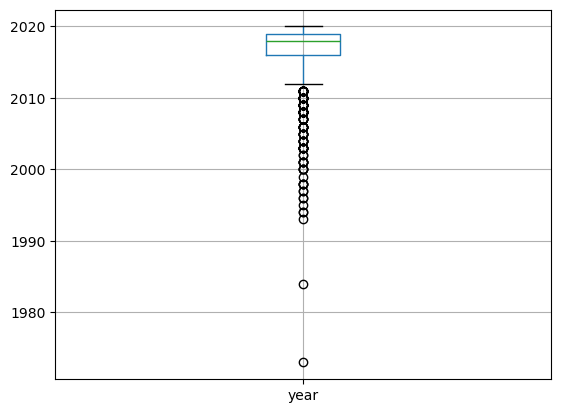

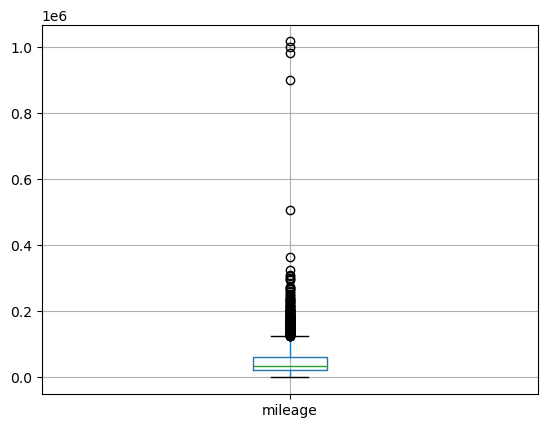

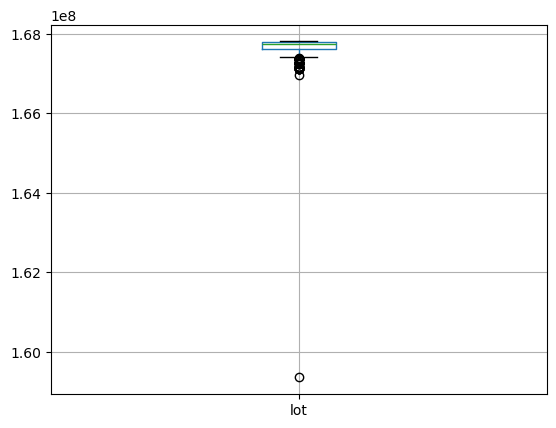

In [4]:
#Finding Outliers
df.boxplot(column="price")
plt.show()

df.boxplot(column="year")
plt.show()

df.boxplot(column="mileage")
plt.show()

df.boxplot(column="lot")
plt.show()

In [5]:
df.shape

(2499, 13)

In [6]:
#Removing Outliers
def remove_outlier(col):
    # Using quantile instead of quartile
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

lrprice, urprice = remove_outlier(df["price"])
df["price"] = np.where(df["price"]>urprice, urprice, df["price"])
df["price"] = np.where(df["price"]<lrprice, lrprice, df["price"])

lrprice, urprice = remove_outlier(df["year"])
df["year"] = np.where(df["year"]>urprice,urprice,df["year"])
df["year"] = np.where(df["year"]<lrprice,lrprice,df["year"])

lrprice, urprice = remove_outlier(df["mileage"])
df["mileage"] = np.where(df["mileage"]>urprice,urprice,df["mileage"])
df["mileage"] = np.where(df["mileage"]<lrprice,lrprice,df["mileage"])

lrprice, urprice = remove_outlier(df["lot"])
df["lot"] = np.where(df["lot"]>urprice,urprice,df["lot"])
df["lot"] = np.where(df["lot"]<lrprice,lrprice,df["lot"])

df.shape

(2499, 13)

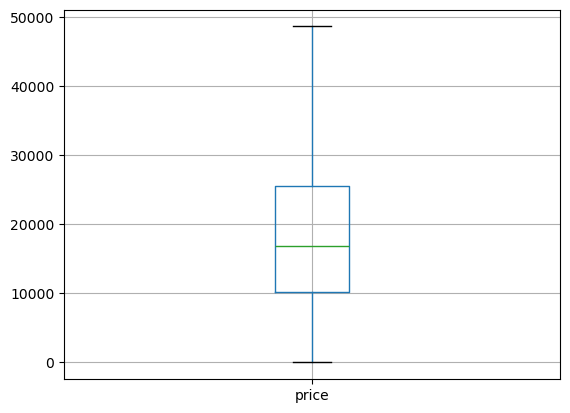

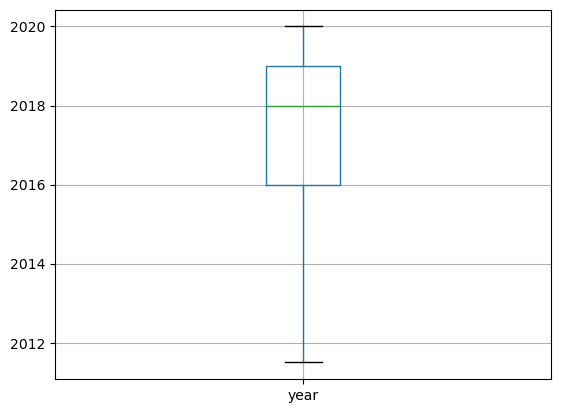

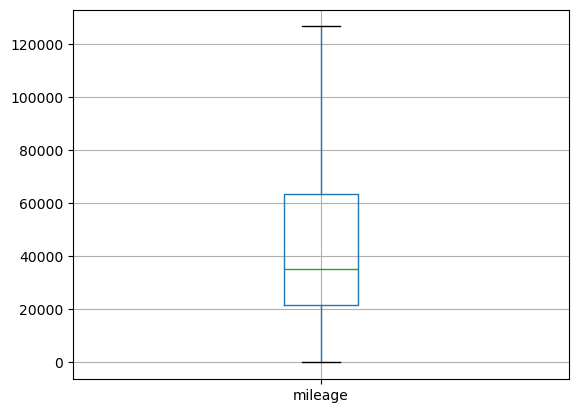

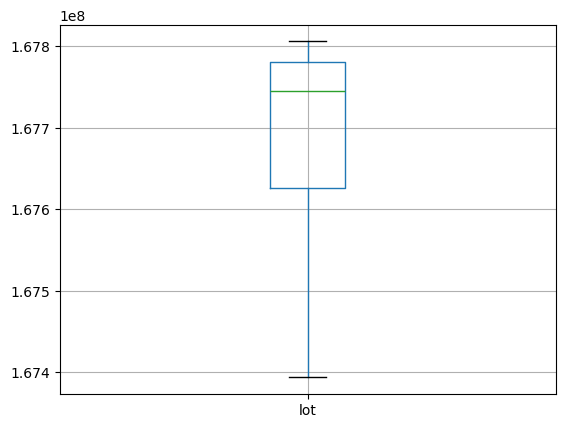

In [7]:
#Rechecking if there is Outliers
df.boxplot(column="price")
plt.show()

df.boxplot(column="year")
plt.show()

df.boxplot(column="mileage")
plt.show()

df.boxplot(column="lot")
plt.show()

In [8]:
#Checking for missing vakues
df.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

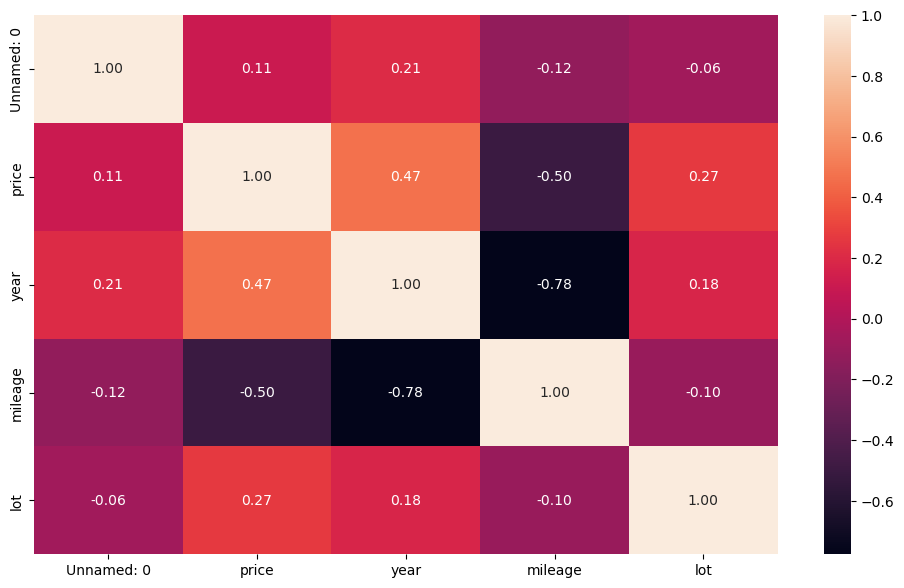

In [9]:
#Filtering only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#Creating the heatmap with only numeric columns
plt.figure(figsize=(12,7))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()

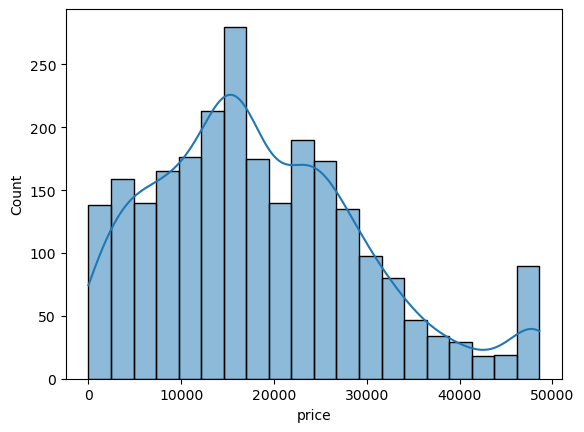

In [10]:
#Univariate analysis
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.show()

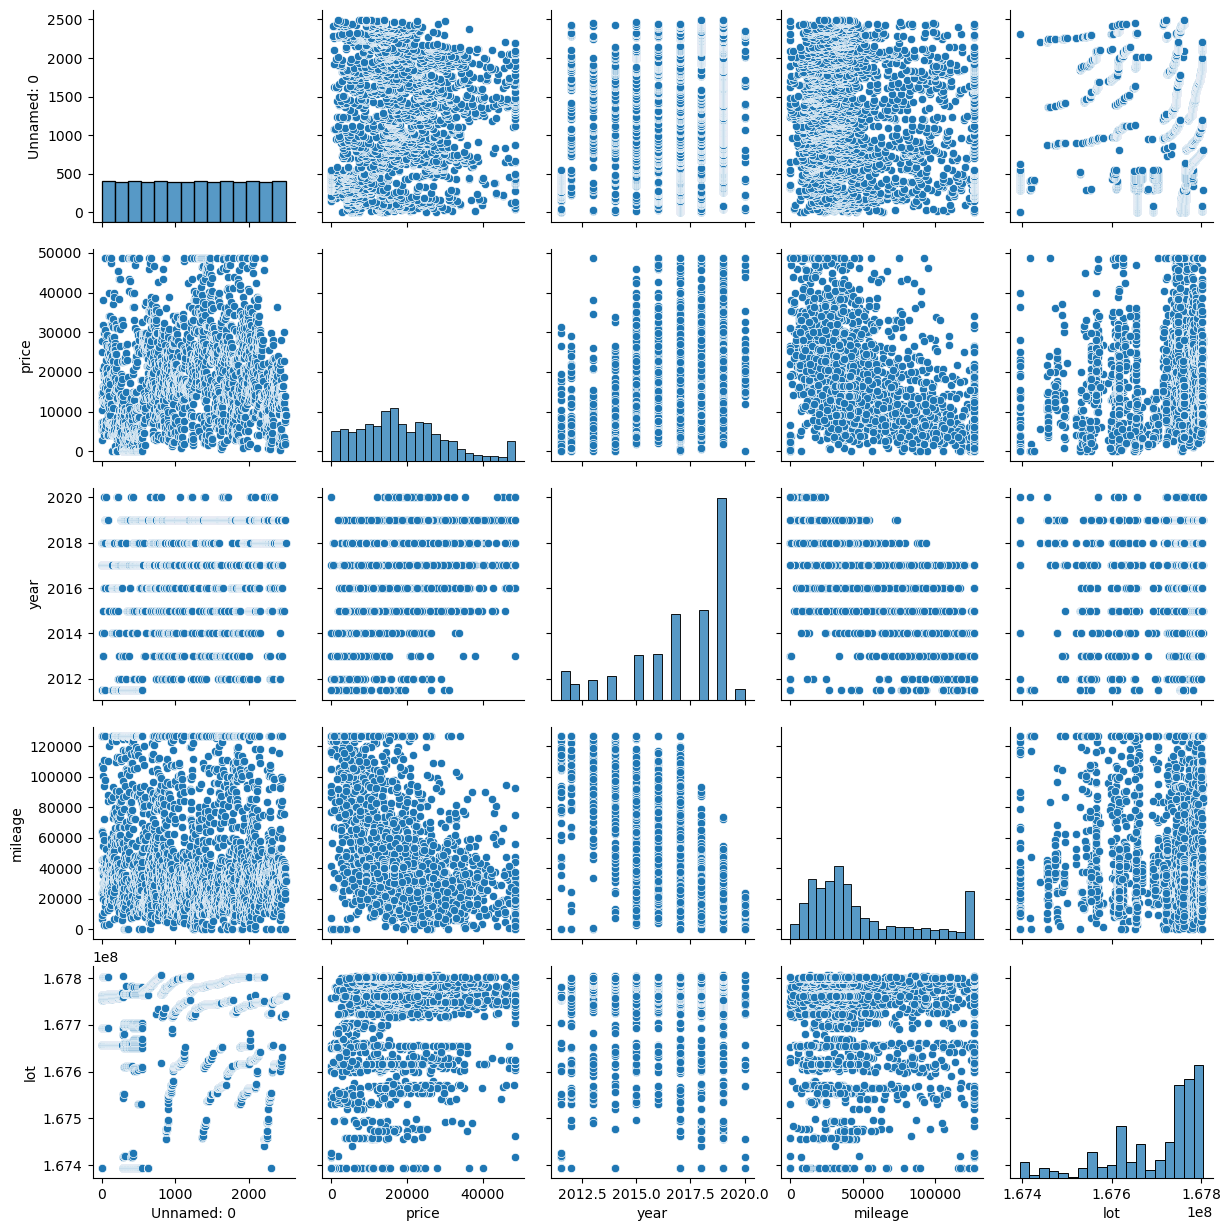

In [11]:
#Bivariate Analysis
sns.pairplot(df)
plt.show()

In [12]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2499.000000,2.499000e+03
mean,1249.000000,18584.732693,2017.007603,47253.574030,1.676981e+08
std,721.543484,11549.422656,2.307900,35334.979517,1.046839e+05
min,0.000000,0.000000,2011.500000,0.000000,1.673937e+08
25%,624.500000,10200.000000,2016.000000,21466.500000,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,35365.000000,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,63472.500000,1.677798e+08
max,2498.000000,48588.750000,2020.000000,126481.500000,1.678055e+08


In [13]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300.0,toyota,cruiser,2011.5,clean vehicle,126481.5,black,jtezu11f88k007763,167393669.5,new jersey,usa,10 days left
1,1,2899.0,ford,se,2011.5,clean vehicle,126481.5,silver,2fmdk3gc4bbb02217,167393669.5,tennessee,usa,6 days left
2,2,5350.0,dodge,mpv,2018.0,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728.0,georgia,usa,2 days left
3,3,25000.0,ford,door,2014.0,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855.0,virginia,usa,22 hours left
4,4,27700.0,chevrolet,1500,2018.0,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266.0,florida,usa,22 hours left


In [14]:
#Importing sklearn for z score normalization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [15]:
df[["price", "year", "mileage", "lot"]] = std_scaler.fit_transform(df[["price", "year", "mileage", "lot"]])

In [16]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,-1.063879,toyota,cruiser,-2.386891,clean vehicle,2.242644,black,jtezu11f88k007763,-2.908420,new jersey,usa,10 days left
1,1,-1.358412,ford,se,-2.386891,clean vehicle,2.242644,silver,2fmdk3gc4bbb02217,-2.908420,tennessee,usa,6 days left
2,2,-1.146151,dodge,mpv,0.430086,clean vehicle,-0.216927,silver,3c4pdcgg5jt346413,-0.404586,georgia,usa,2 days left
3,3,0.555573,ford,door,-1.303438,clean vehicle,0.478161,blue,1ftfw1et4efc23745,0.532966,virginia,usa,22 hours left
4,4,0.789398,chevrolet,1500,0.430086,clean vehicle,-1.149221,red,3gcpcrec2jg473991,0.622884,florida,usa,22 hours left


In [17]:
#Encoding Categorical Variables
dummies = pd.get_dummies(df[["brand", "model", "title_status", "color", "vin", "state", "country", "condition"]], columns=["brand", "model", "title_status", "color", "vin", "state", "country", "condition"], drop_first=True).head()

In [18]:
columns=["brand", "model", "title_status", "color", "vin", "state", "country", "condition"]
df = pd.concat([df, dummies], axis = 1)
df.drop(columns, axis =1, inplace=True)

df.head()

,Unnamed: 0,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,0,-1.063879,-2.386891,2.242644,-2.908420,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,-1.358412,-2.386891,2.242644,-2.908420,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,2,-1.146151,0.430086,-0.216927,-0.404586,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,0.555573,-1.303438,0.478161,0.532966,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,0.789398,0.430086,-1.149221,0.622884,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
